## Chapter 12: Valuation

We first describe the general market model of Bakshi-Cao-Chen. Let $(\Omega,\mathcal{F},\mathbb{F},P)$ be a filtered probability space with final date $T$ with $0 < T < \infty$. $\Omega$ is the continuous state space, $\mathcal{F}$ is a $\sigma$-algebra, $\mathbb{F}$ is a filtration, and $P$ is the real probability measure. Traded securities are a risky stock index $S$ and a risky unit zero-coupon bond $B$. The continuous market model described above will be denoted by
\begin{equation}
    \mathcal{M}^{BCC97} :=\{(\Omega,\mathcal{F},\mathbb{F},P),T,(S,B)\}
\end{equation}

We assume that the there exists a risk neutral measure $Q$ and that the risk neutral dynamics of the stock index $S$ follow the stochastic volatility jump-diffusion model of Bates
\begin{equation}
    dS_t = (r_t-r_J)S_t dt+ \sqrt{v_t}S_tdZ_t^1 + J_tS_tdN_t
\end{equation}
\begin{equation}
    dv_t = \kappa_v(\theta_v-v_t)dt+ \sigma_v\sqrt{v_t}dZ_t^2
\end{equation}

where

- $S_t$ is the index level at time $t$
- $r_t$ is the riskless short rate at time $t$
- $r_J := \lambda e^{\mu_J + \delta^2/2-1}$ is the drift correction for the jump process
- $v_t$ is the variance at time $t$
- $\theta_v$ is the long-term average of the variance
- $\kappa_v$ is speed of adjustment to $\theta_v$
- $\sigma_v$ is the volatility coefficient of the indexes variance
= $Z_t^n$ is standard Brownian motion
- $J_T$ is a jump at time $t$ with distribution $\log(1+J_t) \sim N(\log(1+\mu_J) - \frac{\delta^2}{2},\delta^2)$

The stochastic short rate uses the setup of Cox, Ingersoll, and Ross with dynamics
\begin{equation}
    dr_t = \kappa_r(\theta_r-r_t)dt + \sigma_r\sqrt{r_t}dZ_t^3
\end{equation}

where

- $r_t$ is the short rate at time $t$
- $\theta_r$ is the long-term average of the short rate
- $\kappa_r$ is the speed of adjustment of $r_t$ to $\theta_r$
- $\sigma_r$ is the volatility coefficient of the short rate
- $Z_t^3$ is a standard Brownian motion

All stochastic processes are assumed to be adapted to the filtration $\mathbb{F}$. Moreover, we assume that
- $dZ_t^1dZ_t^2 :=\rho dt$
- $dZ_t^1dZ_t^3 =$
- $dZ_t^2dZ_t^3=0$
- $N_t$ is independent of $Z_t^n$ for $n=1,2,3$.
- The value of a zero coupon bond paying one unit of currency at time $T>t$ is $B_t(T) = \mathbb{E}^{Q}[e^{\int_t^T r_u du} \mid \mathcal{F}_t]$

Note that if we take $\kappa_r$ and $\sigma_r$ to be $0$, then $dr_t=0$ which implies that $r_t = r$ is a constant. Similarly, if we take $\kappa_v$ and $\sigma_v$ to be $0$, then $dv_t = 0$, which implies that $v_t = \sigma^2$ is a constant. Finally, taking $J_t = 0$ gives
\begin{equation}
    dS_t = rS_tdt + \sigma S_t dZ_t^1,
\end{equation}
i.e. $S_t$ follows a geometric Brownian motion. From this, we see that the BCC97 model is a generalization of the Black-Scholes-Merton model.

In [1]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

The BCC97_simulation.py file uses Monte Carlo to simulate short rate paths, variance paths, and finally stock index paths.

In [2]:
%run 12_val/BCC97_simulation.py

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 270
         Function evaluations: 485


The model parameters used in the simulation are:

In [3]:
np.array((S0, r0, kappa_r, theta_r, sigma_r))

array([3225.930, -0.000, 0.147, 0.105, 0.175])

In [4]:
np.array((kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta))

array([22.212, 0.025, 0.952, -0.999, 0.036, 0.008, -0.501, 0.000])

### Simulation

Ten sample simulated short rate paths, volatility paths, and stock index level paths are given in the following figures:

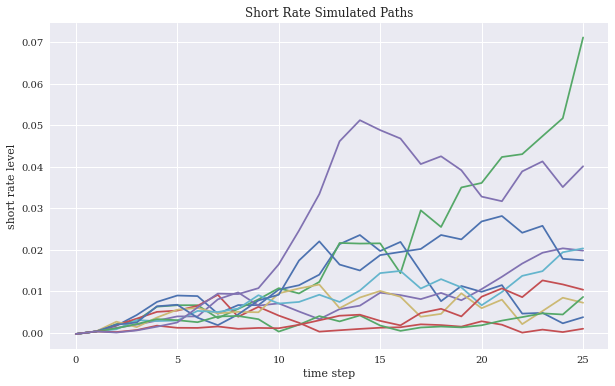

In [5]:
plot_rate_paths(r)

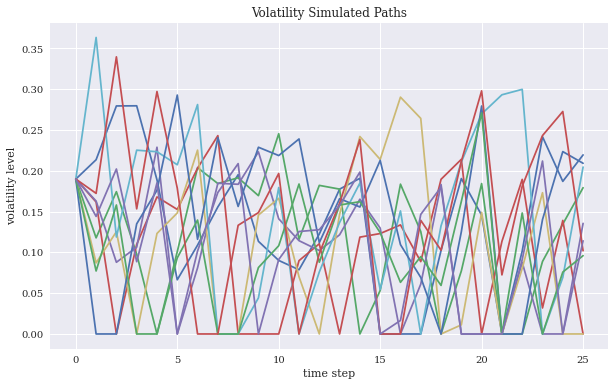

In [6]:
plot_volatility_paths(v)

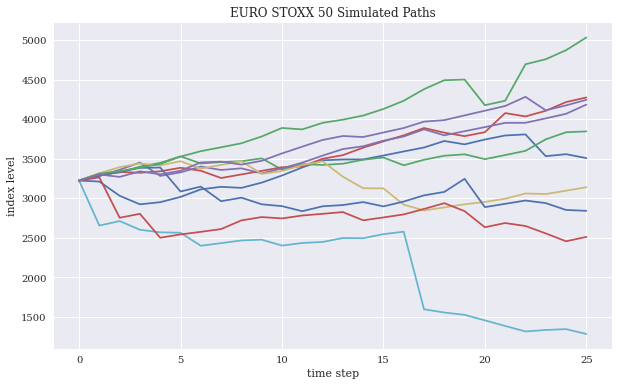

In [7]:
plot_index_paths(S)

A histogram of the Euro STOXX 50 values after 1 year.

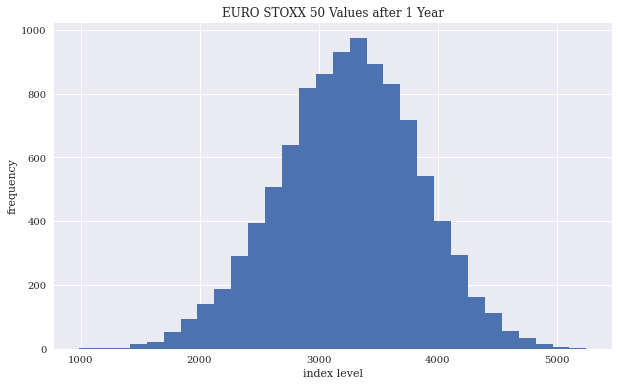

In [8]:
plot_index_histogram(S)

### European Options Valuation

In [9]:
%run 12_val/BCC97_valuation_comparison.py

<Figure size 432x288 with 0 Axes>

In [10]:
%time compare_values(M0=50, I=50000)

      T |      K |      C0 |     MCS |    DIFF
  0.083 |   3050 | 193.692 | 195.584 |   1.892
  0.083 |   3225 |  62.147 |  64.162 |   2.016
  0.083 |   3400 |   1.967 |   2.544 |   0.577
  0.500 |   3050 | 259.126 | 272.960 |  13.834
  0.500 |   3225 | 146.891 | 164.333 |  17.443
  0.500 |   3400 |  67.142 |  85.330 |  18.188
  1.000 |   3050 | 321.419 | 344.280 |  22.861
  1.000 |   3225 | 216.227 | 243.415 |  27.188
  1.000 |   3400 | 133.950 | 162.403 |  28.453
  1.500 |   3050 | 378.978 | 407.035 |  28.057
  1.500 |   3225 | 276.942 | 309.251 |  32.309
  1.500 |   3400 | 193.333 | 227.887 |  34.554
  2.000 |   3050 | 435.337 | 470.659 |  35.322
  2.000 |   3225 | 335.010 | 374.315 |  39.305
  2.000 |   3400 | 250.314 | 291.888 |  41.574
  3.000 |   3050 | 549.127 | 594.413 |  45.287
  3.000 |   3225 | 450.522 | 499.873 |  49.350
  3.000 |   3400 | 364.049 | 416.300 |  52.252
CPU times: user 15.5 s, sys: 842 ms, total: 16.3 s
Wall time: 4.18 s


## Chapter 13: Dynamic Hedging

We now discuss the idea behind dynamic hedging. Consider the value of a call option $c_t(T,K,S_t)$ on an underlying asset $S$ at time $t$ where 

- $T$ is the time of expiry
- $K$ is the strike price
- $S_t$ is the current price of the underlying

Define

\begin{equation}
    \Delta_t^c := \frac{\partial c_t}{\partial S_t}
\end{equation}

Holding $T$ and $K$ fixed, $c_t$ can be thought of as a function of one variable, $S_t$. If $c_t$ is assumed to be differentiable, then we can take exterior derivatives to get

\begin{equation}
    dc_t = \Delta^c_t dS_t,
\end{equation}

which makes sense as an equation of 1-forms on $\mathbb{R}$. This equation can be rewritten as 

\begin{equation}
    dc_t - \Delta^c_t dS_t = 0,
\end{equation}
which implies the portfolio consisting of one call option and $-\Delta^c_t$ shares of the underlying is insensitive to movements in the price of the underlying. This is the idea of $\Delta$-hedging the call option. 

$\Delta$ also appears when we try and reconstruct the payoff of the call option $c_t$. More precisely, consider a portfolio $X$ consisting of $\Delta^c_t$ shares of the underlying at time $t$ and $\gamma_t := c_t - \Delta_t^c S_t$ units of a zero coupon bond $B$ paying one unit at time $T$. Then the value of the portfolio at time $T$ is

\begin{equation}
    X_T = \Delta_T^c S_T + \gamma_T B_T = \Delta_t^c S_T + c_T - \Delta_T^c S_T = c_T.
\end{equation}

The no arbitrage principle implies that $X_t = c_t$ for all $t \leq T$. In particular, we can use replicate the payoff of the option using only the underlying asset and the risk free asset.

I want to claim that choosing the coefficient defining $\gamma_t$ using $\Delta_t^c$ implies that the portfolio $X_t$ is self-financing, i.e.

\begin{equation}
    dX_t = \Delta_t^c dS_t + \gamma_t dB_t.
\end{equation}

Note that for a call, $\Delta_c^t > 0$ which implies that we are long the underlying. For a put, the opposite is true.

We now illustrate dynamic replication of a American put option in the BSM model. The input parameters to the model are:

- $S_0$-initial stock value
- $K$-strike price
- $T$-time to maturity
- $r$-risk-less short rate
- $\sigma$-volatility of stock value
- $M$-number of time steps
- $I$-number of paths

In [11]:
%run 13_dyh/BSM_lsm_hedging_algorithm.py

The input parameters to our model are:

In [12]:
S0,K,T,r,sigma,M,I

(36.0, 40.0, 1.0, 0.06, 0.2, 50, 50000)

The file 13_dyh/BSM_lsm_hedging_algorithm.py implements dynamic hedging for a single simulated stock path. It contains three main functions:

The first function, BSM_lsm_put_value(S0, M, I), computes the value of an American put option using the Longstaff-Schwarz LSM algorithm which is stands for Least-Squares Monte Carlo simulation. The idea This function returns:

- $V_0$ - LSM Monte Carlo estimator of American put option value (float)
- $S$ - $I$ simulated index level paths, each consisting of $M$ time steps ($I$ by $M$ NumPy array)
- $ex$ - exercise matrix (NumPy array)
- $rg$ - regression coefficients (NumPy array)
- $h$ - inner value matrix (NumPy array)
- $dt$ - length of time interval (float)

We give a brief discussion of the LSM algorithm below. To price an American option, at any time prior to expiry, one must compare the payoff from immediate exercise to the expected payoff from continuation, i.e. holding the option. The key idea of the LSM algorithm is that the expected payoff from continuation, which is an expectation conditional on current price of the underlying, can be estimated using Monte Carlo simulation and linear regression. This can be used to compute the stopping time which maximizes the value along each path. Using this stopping time, we can price the American option by discounting each cashflow to time $0$ and averaging. More precisely, one has the following recursive algorithm:

1. One first simulates paths of the underlying following some specific price dynamics, i.e. GBM, using discrete time steps $0=t_0< t_1 < \cdots< t_n=T$.
2. One then computes the payoff at the option at expiry (this payoff is the same as for a European option)
3. One then decides if we should exercise the option along each path at step $t_{n-1}$ as follows: 
    - Look at all paths which are in the money
    - Estimate the discounted payoff from continuation by running a linear regression with dependent variable equal to the discounted payoff of the option at expiry and independent variable equal to the current stock price at $t_{n-1}$ along the path. Note that one typically uses more independent variables which are derived from the current stock price.
    - Use the regression function to estimate payoffs of continuation for each of the in the money paths.
    - Compare the estimated payoff of continuation to the payoff from immediate exercise to decide if early exercise is warranted. 
    - Update the cash flows if we decide to early exercise along a certain path
4. Continue recursively until compute the optimal exercise time for each path.
5. Discount the cash flows of each path to time $0$ and average to obtain a price for the American option. 
    

The second function, BSM_hedge_run(p), numerically approximates the Delta's of the American put for a *single* path. This path is specified by an input $p$ which ranges between $1$ and $I$. This function returns:

- $S$ - The $p^{th}$ simulated stock path
- $po$ - The values of the replicating portfolio (vector)
- $vt$ - The values of the option (vector)
- $errs$ - The hedging errors (vector)
- $t$ - The exercise time step (integer)

The approximation of the Delta proceeds as follows. We first estimate an initial delta using the difference quotient formula

  \begin{equation}
        \Delta_0 = \frac{P_0(S_0+0.01) - P_0(S_0)}{0.01}
    \end{equation}
    
    where $P_0$ is the estimated initial prices of the American Put given by the LSM algorithm. 
    
2. Estimate subsequent deltas using the difference quotient formula 

    \begin{equation}
        \Delta_t = \frac{\hat{V}_t(\hat{S}_t+0.01) - \hat{V}_t(\hat{S}_t)}{0.01}
    \end{equation}
    
    where $\hat{V}_t$ is the LSM regression estimate of the American Put value at time $t$ and $\hat{S}_t$ is the simulated price level at time $t$ (recall that this algorithm is computing the $\delta$ values along a single path). 
    
Note that it looks like the function is making two separate calls to BSM_lsm_put_value, but each call returns the same price path since the random seed is fixed.

This function also prints two tables:

- The first table contains information about the stock path and the option's Delta. We note that Gamma $(\frac{\partial \Delta}{\partial S})$ of a American put must always be non-negative since the payoff is convex. If the estimated Delta of the option gives a negative Gamma, we display "wrong" in the table.
- The second table contains information about the stock path, replicating portfolio value, option value, stock position, cash position, and hedging errors. Note that the "port" column giving the value of the replicating portfolio and the "cost" column of the table are the same. Is this correct?

There is a cost associated to delta hedging. This is observable in the regular rehedges table below. Notice that at time step 1, we short .789 units of the underlying at a price of 34.97. At time step 2, we reduce our short position to .700 units of the underlying. This means that we had to buy .089 units of the underlying at a price of 36.14. Since we originally shorted those .089 units of the underlying for 34.97, the cost of this rehedging is 
\begin{equation}
 .089(36.14-34.97) = .104
\end{equation}

This doesn't agree with the cost column in the "regular rehedges" column, but seems like the right way to compute the costs of hedging.

The third main function prints graphs of:
- The $p^{th}$ simulated stock path
- The value replicating portfolio compared to the value of the option
- The differences between the two values.

In [13]:
S, po, vt, errs, t = BSM_hedge_run(p=25)

APPROXIMATION OF FIRST ORDER 
-----------------------------
    step |     S_t |   Delta 
       1 |   34.97 |   -0.79
       2 |   36.14 |   -0.70
       3 |   36.40 |   -0.67
       4 |   37.61 |   -0.59
       5 |   37.41 |   -0.59
          wrong
       6 |   38.52 |   -0.54
       7 |   39.43 |   -0.48
       8 |   40.09 |   -0.43
       9 |   40.07 |   -0.41
          wrong
      10 |   41.79 |   -0.32
      11 |   41.26 |   -0.33
      12 |   40.22 |   -0.38
      13 |   38.42 |   -0.51
      14 |   37.98 |   -0.57
      15 |   36.79 |   -0.68
      16 |   35.86 |   -0.78
      17 |   34.49 |   -0.90
      18 |   34.48 |   -0.90

DYNAMIC HEDGING OF AMERICAN PUT (BSM)
---------------------------------------
Initial Hedge
Stocks               -0.995
Bonds                40.303
Cost                  4.474

Regular Rehedges 
--------------------------------------------------------------------
step|     S_t|    Port|     Put|    Diff|   Stock|    Bond|    Cost|
   1|  34.968|   5.549

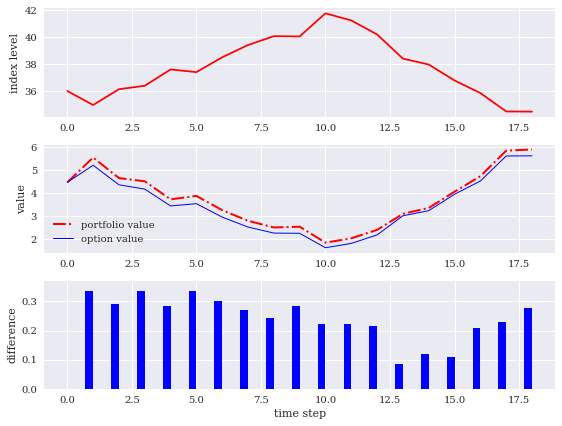

In [14]:
plot_hedge_path(S, po, vt, errs, t)

Note that the replicating portfolio has over-replicated the options payoff which leads to a profit at exercise (recall that we are long the replicating port"folio and short the option). 

The next example shows an example of a path whose replicating portfolio under-replicates the options payoff which leads to a loss at exercise.

In [15]:
S, po, vt, errs, t = BSM_hedge_run(p=5)

APPROXIMATION OF FIRST ORDER 
-----------------------------
    step |     S_t |   Delta 
       1 |   35.31 |   -0.75
       2 |   36.25 |   -0.69
       3 |   37.50 |   -0.61
       4 |   35.98 |   -0.69
       5 |   36.52 |   -0.65
       6 |   35.98 |   -0.70
       7 |   35.55 |   -0.75
       8 |   35.89 |   -0.72
       9 |   38.18 |   -0.53
      10 |   38.25 |   -0.52
      11 |   38.00 |   -0.54
      12 |   37.80 |   -0.56
      13 |   39.22 |   -0.45
      14 |   39.54 |   -0.44
      15 |   39.82 |   -0.42
      16 |   39.29 |   -0.46
      17 |   38.11 |   -0.56
      18 |   38.10 |   -0.57
      19 |   39.61 |   -0.43
      20 |   40.22 |   -0.39
      21 |   39.78 |   -0.43
      22 |   39.90 |   -0.42
      23 |   39.82 |   -0.44
      24 |   41.30 |   -0.32
      25 |   42.60 |   -0.23
      26 |   42.86 |   -0.21
      27 |   44.64 |   -0.13
      28 |   42.78 |   -0.22
      29 |   42.22 |   -0.26
      30 |   42.15 |   -0.27
      31 |   41.36 |   -0.33
      32 | 

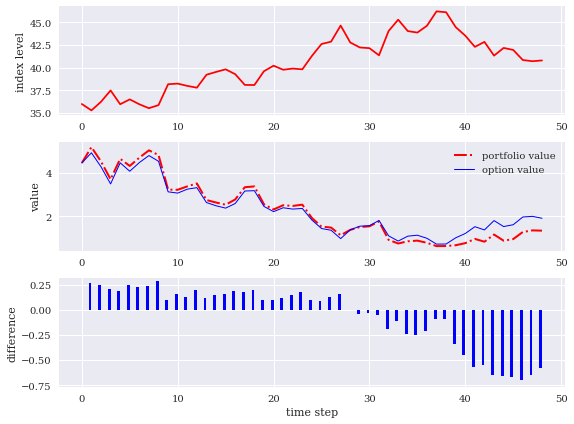

In [16]:
plot_hedge_path(S, po, vt, errs, t)

From the graph we see that the replicating portfolio under-replicates the option payoff at expiry.

In [17]:
%run 13_dyh/BSM_lsm_hedging_histogram.py

<Figure size 432x288 with 0 Axes>

The file 13_dyh/BSM_lsm_hedging_histogram.py implements dynamic hedging for multiple simulated stock paths. It contains two functions.

The first function, BSM_dynamic_hedge_mcs(M,I), takes as input:
- $M$ - The number of time steps (integer)
- $I$ - The number of simulated paths

and outputs:

- pl_list - The discounted differences between the value of the replicating portfolios and the value of the option for each of the simulated price paths (vector of length $I$)

In [18]:
%time pl_list = BSM_dynamic_hedge_mcs()

Value of American Put Option is    4.493
Delta t=0 is                      -0.406
run  1000   p/l    0.339
run  2000   p/l   -0.067
run  3000   p/l    0.379
run  4000   p/l   -0.029
run  5000   p/l    0.286
run  6000   p/l    0.244
run  7000   p/l   -0.761
run  8000   p/l   -0.761
run  9000   p/l   -0.002
run 10000   p/l   -0.258

SUMMARY STATISTICS FOR P&L
---------------------------------
Dynamic Replications        10000
Time Steps                     50
Paths for Valuation         10000
Maximum                     5.447
Average                     0.041
Median                      0.036
Minimum                   -11.475
---------------------------------
CPU times: user 7.78 s, sys: 1.04 s, total: 8.82 s
Wall time: 6.35 s


## Chapter 12: Valuation

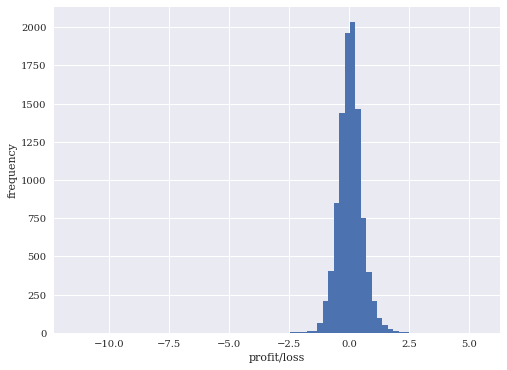

In [19]:
plot_hedge_histogram(pl_list)

The histogram shows that on average, the replicating portfolio very closely replicates the payoff of the option at expiry. These hedging errors can be reduced by increasing the number of steps and the number of simulated paths as the next example shows.

Notice that the number of time steps has increased from 50 to 200 and the number of simulated paths has increased from 10000 to 150000.

In [20]:
time pl_list = BSM_dynamic_hedge_mcs(M=200, I=150000) 

Value of American Put Option is    4.471
Delta t=0 is                      -1.028
run  1000   p/l   -0.025
run  2000   p/l    0.056
run  3000   p/l    0.170
run  4000   p/l    0.353
run  5000   p/l   -0.014
run  6000   p/l   -0.208
run  7000   p/l   -0.124
run  8000   p/l   -0.359
run  9000   p/l   -0.030
run 10000   p/l   -0.008

SUMMARY STATISTICS FOR P&L
---------------------------------
Dynamic Replications        10000
Time Steps                    200
Paths for Valuation        150000
Maximum                     2.134
Average                     0.004
Median                      0.016
Minimum                    -1.323
---------------------------------
CPU times: user 1min 23s, sys: 5.1 s, total: 1min 28s
Wall time: 35.2 s


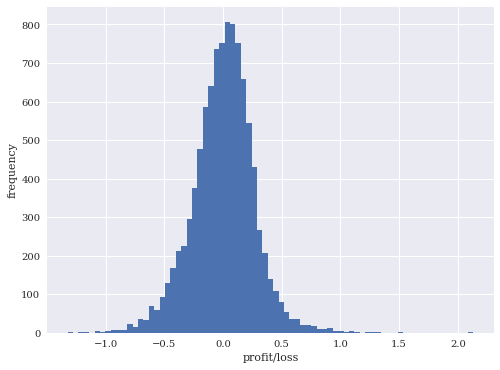

In [21]:
plot_hedge_histogram(pl_list)

Notice that the after increasing the number of time steps and the number of simulated paths, the mean hedging error has decreased from 0.041 to 0.004. The cost of this increased accuracy is time, which increased from total CPU time of 8.63s to 1min 24s.